<a href="https://colab.research.google.com/github/matsunagalab/tutorial_analyzingMDdata/blob/main/md_superpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superpose of trajectory

## MDTrajのインストール

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:27
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge mdtraj

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blosc-1.21.4               |       h0f2a231_0          48 KB  conda-forge
    c-blosc2-2.10.0            |       hb4ffafa_0         298 KB  conda-forge
    ca-certificates-2023.5.7 

## T4 LysozymeのMDデータの取得

比較のために wildtype と mutant 関連のデータをダウンロードする。

In [2]:
!gdown 1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
!gdown 1GeXp7pbLO8nuK5L6x1xzxj1AX6kMnXy6
!gdown 1G_dnmdjgKFr-O8ciNo5JVR9iN4FQBAAE

!gdown 1Lwx8zhPSBMApi94QZtpLW7pMUzj2wDhv
!gdown 1GbwP2NbHn4QMDFTanhpFwdvnUz2EPOMn
!gdown 1G_8UijRvld_-Df5OU4I3fNn8URpDtf54

Downloading...
From: https://drive.google.com/uc?id=1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
To: /content/wildtype.pdb
100% 209k/209k [00:00<00:00, 76.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GeXp7pbLO8nuK5L6x1xzxj1AX6kMnXy6
To: /content/wildtype.psf
100% 623k/623k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G_dnmdjgKFr-O8ciNo5JVR9iN4FQBAAE
To: /content/wildtype.dcd
100% 215M/215M [00:04<00:00, 51.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Lwx8zhPSBMApi94QZtpLW7pMUzj2wDhv
To: /content/mutant.pdb
100% 208k/208k [00:00<00:00, 92.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GbwP2NbHn4QMDFTanhpFwdvnUz2EPOMn
To: /content/mutant.psf
100% 621k/621k [00:00<00:00, 88.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G_8UijRvld_-Df5OU4I3fNn8URpDtf54
To: /content/mutant.dcd
100% 119M/119M [00:01<00:00, 65.6MB/s]


## トラジェクトリの重ね合わせ


In [3]:
import mdtraj as md
import numpy as np

w_ref = md.load('/content/wildtype.pdb')
w = md.load('/content/wildtype.dcd', top='/content/wildtype.psf')

In [4]:
w.superpose(w_ref, 0)

<mdtraj.Trajectory with 6768 frames, 2643 atoms, 164 residues, and unitcells at 0x7c07e942e6e0>

In [5]:
m_ref = md.load('/content/mutant.pdb')
m = md.load('/content/mutant.dcd', top='/content/mutant.psf')

In [6]:
m.superpose(m_ref, 0)

<mdtraj.Trajectory with 3741 frames, 2636 atoms, 164 residues, and unitcells at 0x7c07ea213a00>

In [7]:
# save superposed trajectories
w.save('wildtype_superposed.h5')
m.save('mutant_superposed.h5')

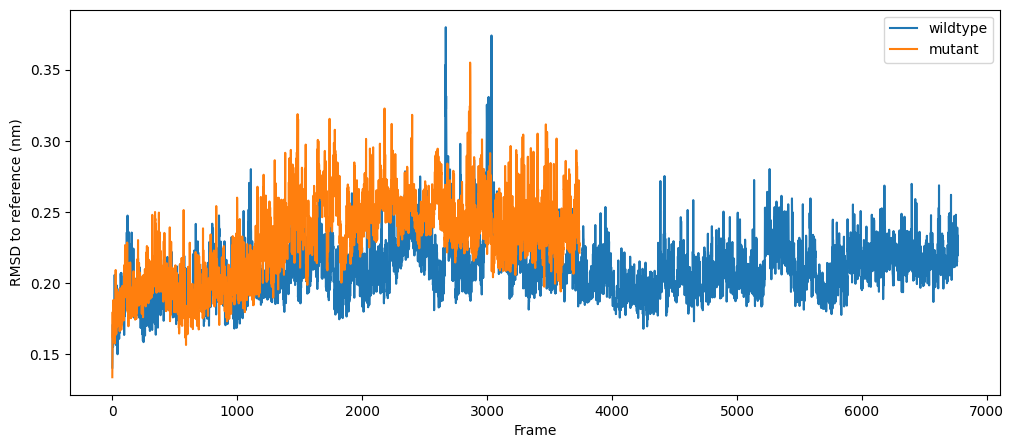

In [15]:
import matplotlib.pyplot as plt

# Compute RMSD of each frame to the reference
w_rmsd = md.rmsd(w, w_ref)
m_rmsd = md.rmsd(m, m_ref)

# Plot the RMSD
plt.figure(figsize=(12, 5))
plt.plot(w.time, w_rmsd, label="wildtype")
plt.plot(m.time, m_rmsd, label="mutant")
plt.legend()
plt.xlabel('Frame')
plt.ylabel('RMSD to reference (nm)')
plt.show()